# Assignment on Titanic dataset to improve the Accuracy

### Importing libraries and Checking the Data.

In [46]:
# Import all the libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yaml import warnings
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')




In [47]:
# Show maximum columns and rows in the data.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [48]:
# Load the dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_submission = pd.read_csv("gender_submission.csv")

In [49]:
#checking the shape of the dataset
print("Shape of the training dataset:", df_train.shape)
print("Shape of the testing dataset:", df_test.shape)
print("Shape of the submission dataset:", df_submission.shape)

Shape of the training dataset: (891, 12)
Shape of the testing dataset: (418, 11)
Shape of the submission dataset: (418, 2)


In [50]:
# checking the first rows of each dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
#now we will remove the target column from train and store it in y, and then we will merge train and test data for further processing.
y = df_train["Survived"]
df_train.drop("Survived", axis = 1, inplace = True)

In [53]:
# reseting the index
y = y.reset_index(drop = True)

#show the data in y column
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [54]:
# create a test copy of the df_test dataframe.
df_test = df_test.copy()

# merge df_train and df_test and create a new column df for further processing
df = pd.concat([df_train, df_test], axis = 0,)

In [55]:
#now we will see how the data in df looks like afer merging.
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Pre-Processing of the Data.

In [56]:
# checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [57]:
#checking for missing values in the data
df.isnull().sum().sort_values(ascending=False)

Cabin          1014
Age             263
Embarked          2
Fare              1
Name              0
PassengerId       0
Pclass            0
Parch             0
SibSp             0
Sex               0
Ticket            0
dtype: int64

In [58]:
#checking the percentage of missing values in the data
((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)

Cabin          77.463713
Age            20.091673
Embarked        0.152788
Fare            0.076394
Name            0.000000
PassengerId     0.000000
Pclass          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Ticket          0.000000
dtype: float64

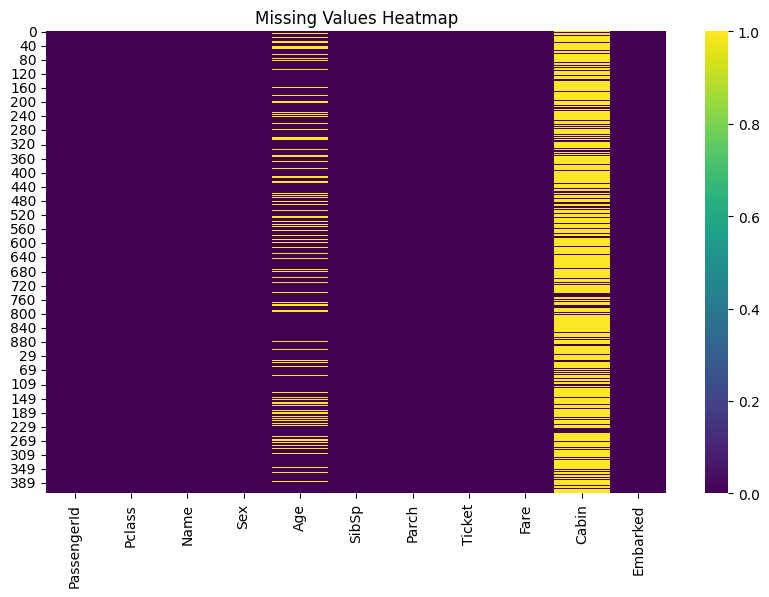

In [59]:
# lets visualize the missing values in the data using heatmap and the colour of the heatmap will be blue.
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar = True, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [60]:
# since cabin has 78% of missing values lets check it.
df["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [61]:
df["Cabin"].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
C78                4
D                  4
F2                 4
B96 B98            4
C22 C26            4
A34                3
E34                3
C101               3
B51 B53 B55        3
E101               3
B58 B60            3
D26                2
D10 D12            2
E33                2
C93                2
C83                2
C52                2
E31                2
F G73              2
B28                2
D35                2
C65                2
C54                2
B49                2
C106               2
E67                2
B77                2
D36                2
C2                 2
C125               2
B5                 2
B20                2
F G63              2
B71                2
C62 C64            2
C126               2
B22                2
C7                 2
B35                2
D21                2
C92                2
D20                2
E25    

In [62]:
# checking the unique values in the cabin column
df["Cabin"].nunique()

186

### Missing values Imputation.

In [63]:
# impute missing values with regression imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [64]:
# call the IterativeImputer class with max_iter = 10
imputer = IterativeImputer(max_iter=10)

#impute missing values with regression imputer
df['Age'] = imputer.fit_transform(df[['Age']])
df['Fare'] = imputer.fit_transform(df[['Fare']])

# check the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Cabin          1014
Embarked          2
PassengerId       0
Name              0
Pclass            0
Sex               0
Age               0
Parch             0
SibSp             0
Fare              0
Ticket            0
dtype: int64

In [65]:
''' Note: As we fill or impute the missing values in the age column using iterative imputer, we can do this for other columnns 
with nominal data as wwell, but for that first we have to transform the data using encoder techniques and after imputaing the 
missing values you can inverse transform the data to get the original data back. '''

' Note: As we fill or impute the missing values in the age column using iterative imputer, we can do this for other columnns \nwith nominal data as wwell, but for that first we have to transform the data using encoder techniques and after imputaing the \nmissing values you can inverse transform the data to get the original data back. '

In [66]:
# now we will impute the missing values in the embarked column with the most frequent value in that column.
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


In [67]:
# now we will check for missing values in the data again to confirm that we have imputed all the missing values in the data.
df.isnull().sum().sort_values(ascending=False)

Cabin          1014
Pclass            0
PassengerId       0
Name              0
Sex               0
SibSp             0
Age               0
Parch             0
Ticket            0
Fare              0
Embarked          0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [69]:
# now lets see the ticket column
df["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [70]:
df["Ticket"].nunique()

929

In [71]:
#we will drop the ticket column as it has 681 unique values and it will not be useful for our model.
df.drop("Ticket", axis = 1, inplace = True)

In [72]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [73]:
# create a new column called "FamilySize" which is the sum of "SibSp" and "Parch" columns.
df["FamilySize"] = df["SibSp"] + df["Parch"]+1

In [74]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1


In [75]:
# Encode the categorical variables in the data using label encoder using for loops.
for column in df.columns:
    if df[column].dtype == "object":
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [76]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize
0,1,3,155,1,22.0,1,0,7.2500,186,2,2
1,2,1,286,0,38.0,1,0,71.2833,106,0,2
2,3,3,523,0,26.0,0,0,7.9250,186,2,1
3,4,1,422,0,35.0,1,0,53.1000,70,2,2
4,5,3,22,1,35.0,0,0,8.0500,186,2,1


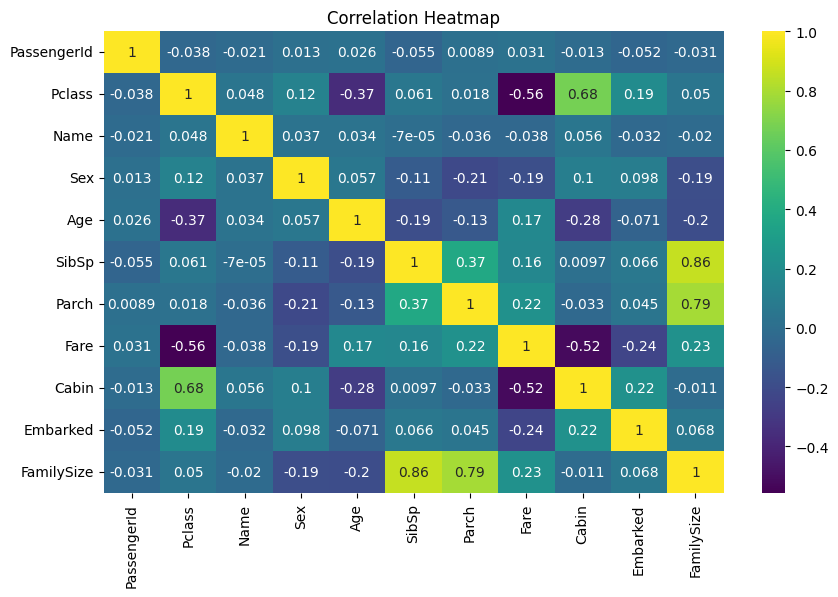

In [77]:
# create a heatmap to see the correlation between the features in the data.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

In [78]:
# since cabin has 78% of missing values and it is not useful for our analysis, we will drop the cabin column from the data.
df.drop("Cabin", axis = 1, inplace = True)

In [79]:
df.head(26)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,3,155,1,22.000000,1,0,7.2500,2,2
1,2,1,286,0,38.000000,1,0,71.2833,0,2
2,3,3,523,0,26.000000,0,0,7.9250,2,1
3,4,1,422,0,35.000000,1,0,53.1000,2,2
4,5,3,22,1,35.000000,0,0,8.0500,2,1
5,6,3,818,1,29.881138,0,0,8.4583,1,1
6,7,1,767,1,54.000000,0,0,51.8625,2,1
7,8,3,914,1,2.000000,3,1,21.0750,2,5
8,9,3,605,0,27.000000,0,2,11.1333,2,3
9,10,2,847,0,14.000000,1,0,30.0708,0,2


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   int64  
 9   FamilySize   1309 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 112.5 KB


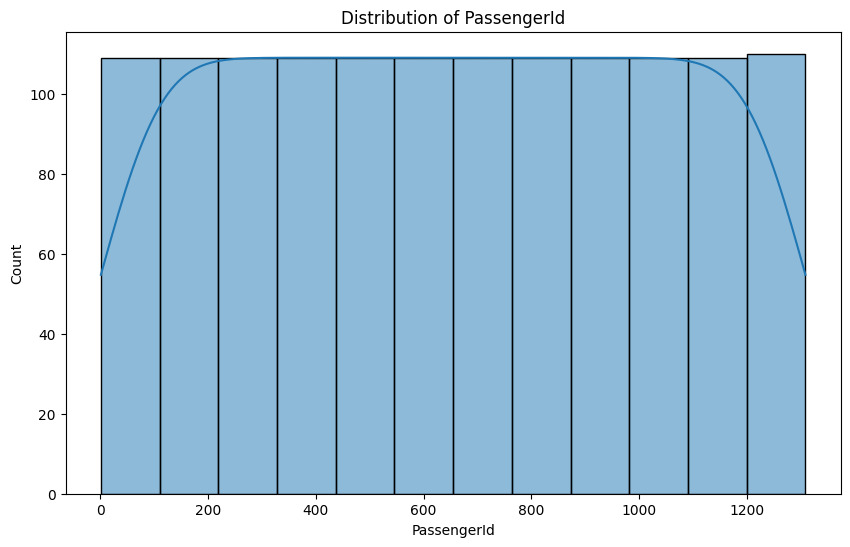

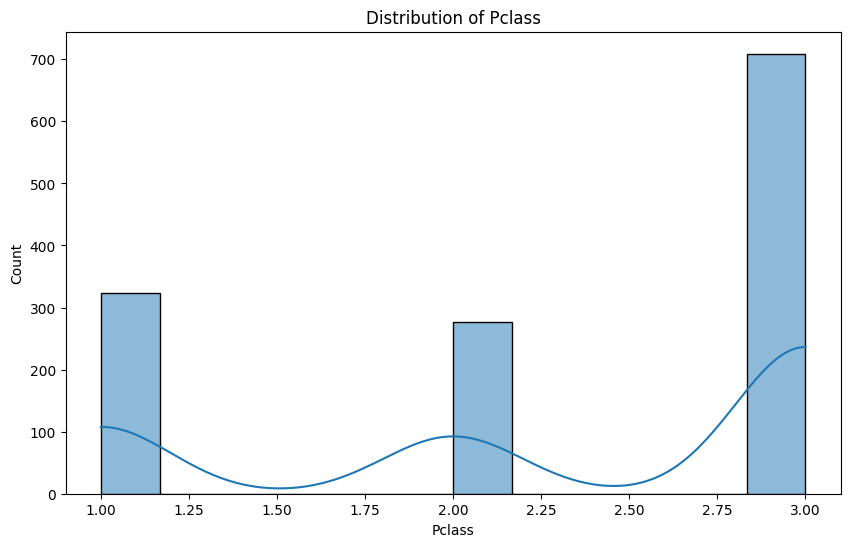

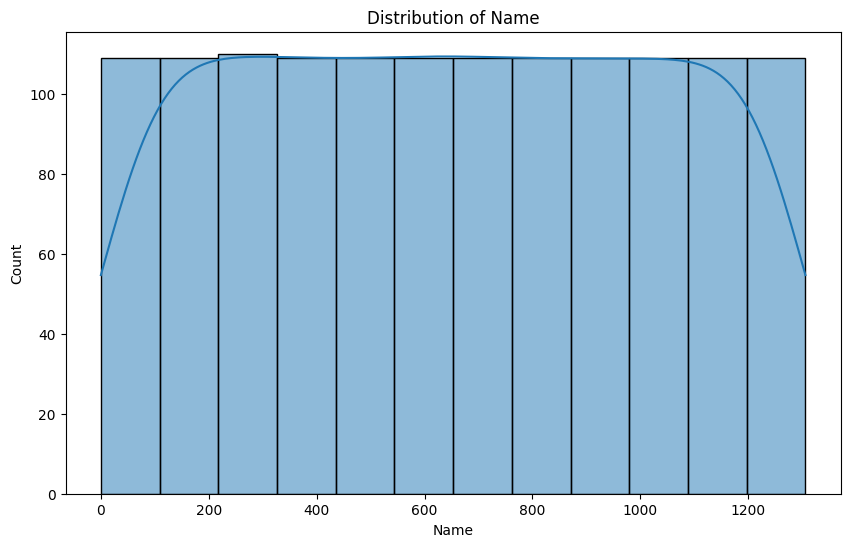

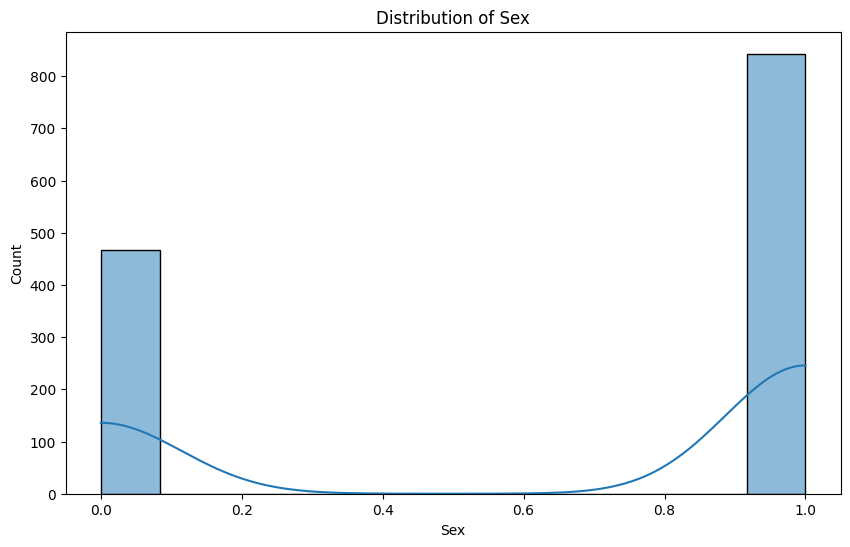

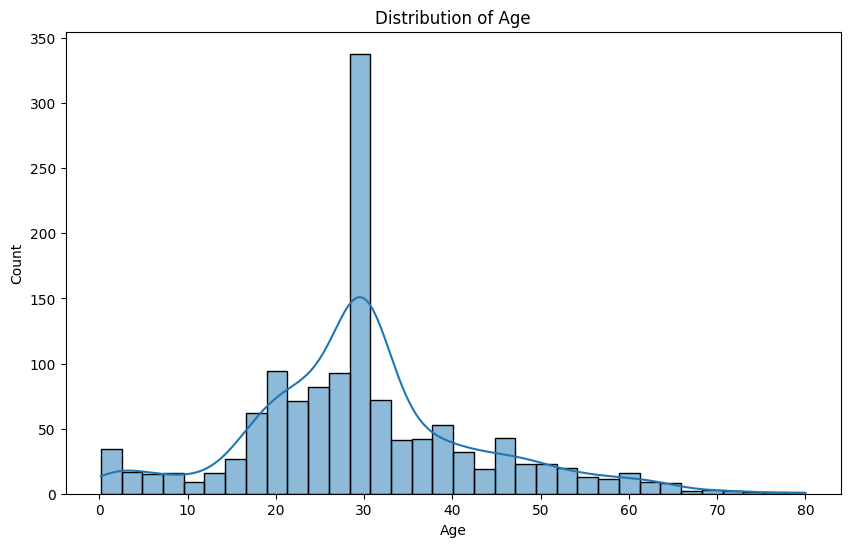

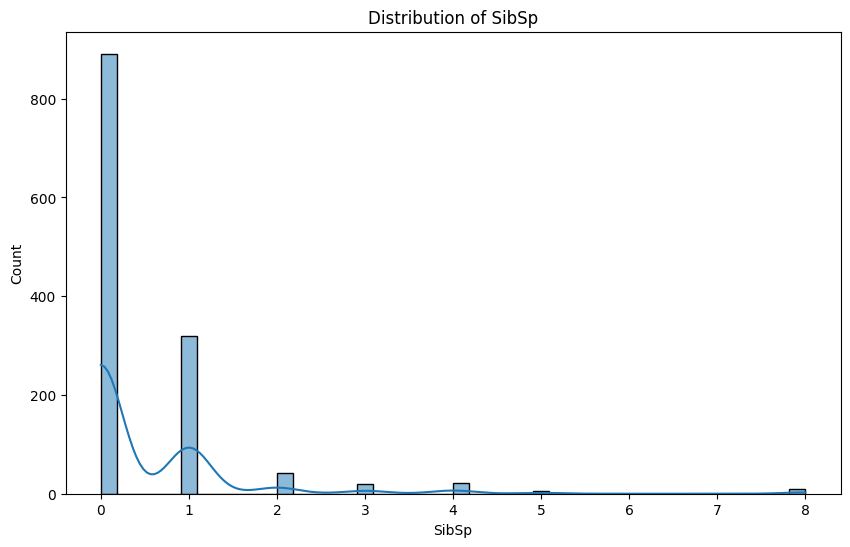

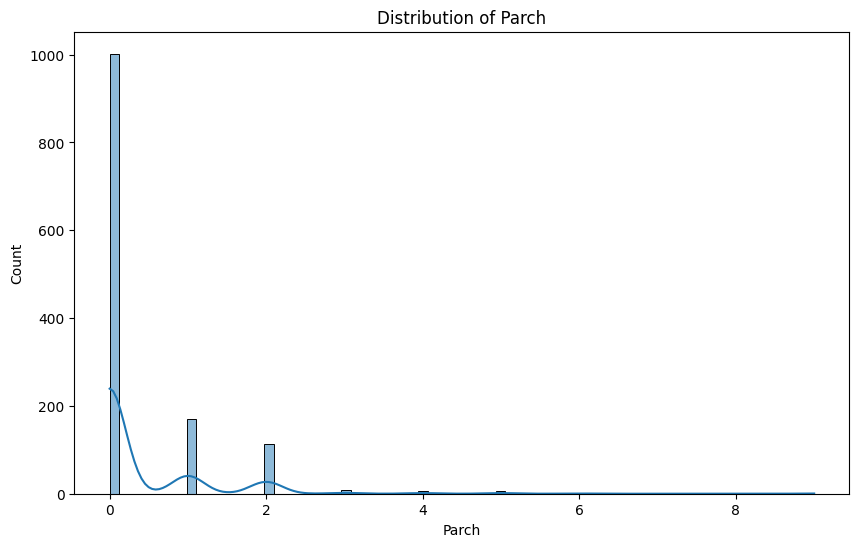

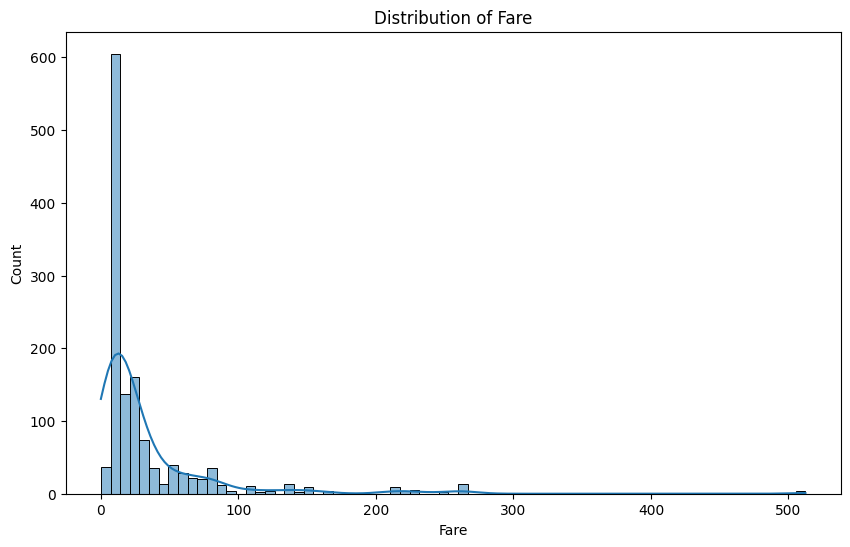

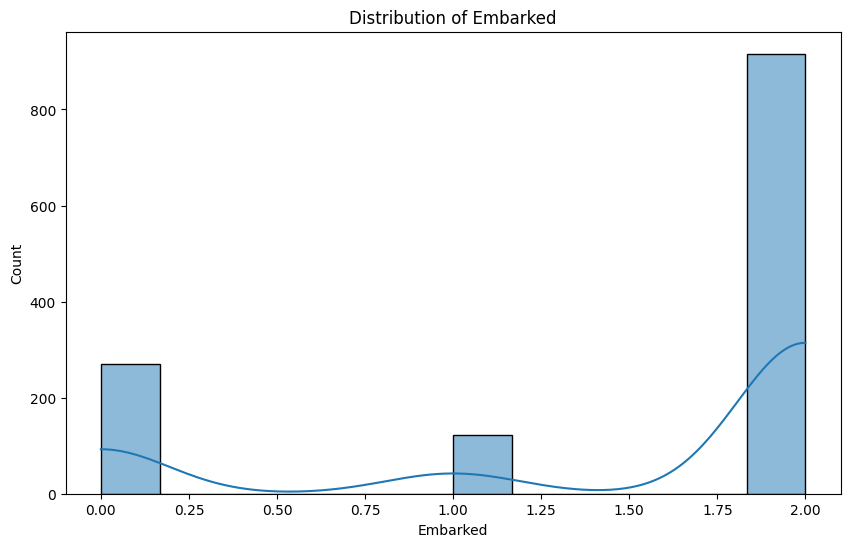

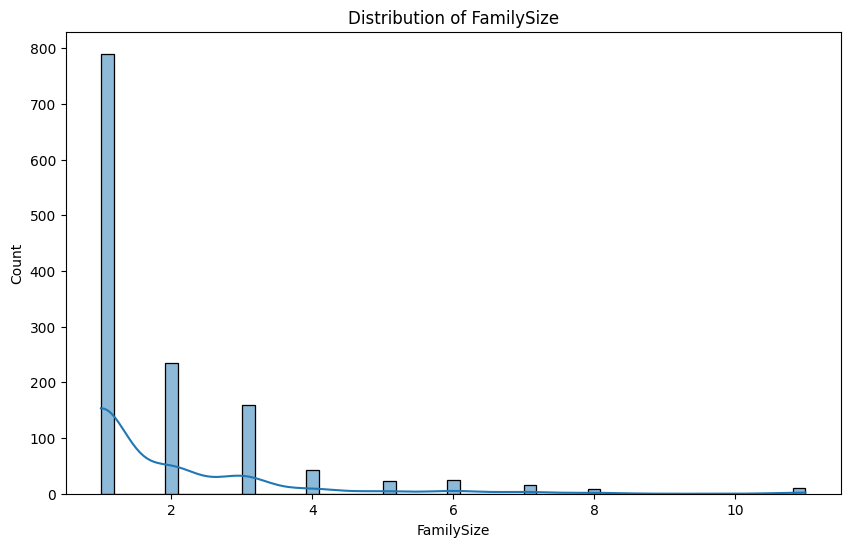

In [81]:
#create the distribution of the whole data using for loops.
for column in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[column], kde = True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [82]:
# convert the data in the df dataframe to numpy array and store it in X.
X = df

### Training the Model.

In [83]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df[:len(y)], y, test_size = 0.2, random_state = 42)

In [84]:
# print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 10)
Shape of X_test: (179, 10)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [85]:
# train the model using XGBoost Classifier
model = XGBClassifier()
model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [86]:
#predict the values using the model
y_pred = model.predict(X_test)

In [87]:
# accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)   

Accuracy of the model: 0.8379888268156425


In [88]:
# classification report of the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [89]:
# cheeck the confusion matrix of the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[93 12]
 [17 57]]


In [90]:
# create a new column 